## 「プチ」勉強会 20230610
* Matplotlibの自作関数クラス化の続き
* せっかくクラスの実装をやったので、もう少し弄ってみた
* 基本的には、先週作成した複合グラフ作成クラスの機能拡張を、新しい要素を加えつつ、<br>
  分かりやすくメンテしやすく効率的にするのが目的

### 今回取り組んでみたもの

1. クラスの継承（これは普通に有効、機能追加のベースとなる）<br>
    なお、取り敢えず多重継承するほどの材料がないので多重継承はパス
2. super()による親クラスメソッドの利用と機能の追加
3. @classmethod, @staticmethodという手法もあるがここでは使いどころが見出せないのでパス
3. Mixinクラスによる機能の付加（6.のデスクリプタの方が優秀だったがせっかくやったので今回は残した）
4. デコレータによる機能の追加
    ⇒ これは先週やった@mpl.rc_context(rc_dict)<br>
       @propatyも利用できるがデコレータは各メソッドにいちいち付けなければならないのが煩雑<br>
       今週のテーマは、よりシンプルに重複を回避する方法の模索なのでパス
5. デスクリプタ利用による機能の追加（まだまだ先がありそうなテーマ）

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
sns.set_style('dark')
import japanize_matplotlib
from graph_func import Dual_axis
#mpl.style.use('ggplot')

In [2]:
df = pd.read_excel('SSDSE-E-2023.xlsx', skiprows=2, index_col=1)

In [3]:
display(df.iloc[1:7, 2:5])
display(df.iloc[1:7, [10, 11]])

,日本人人口,15歳未満人口,15～64歳人口
都道府県,,,
北海道,5147000,544000,2953000
青森県,1216000,127000,676000
岩手県,1189000,129000,659000
宮城県,2269000,264000,1371000
秋田県,941000,90000,495000
山形県,1048000,117000,576000


,転入者数（日本人移動者）,転出者数（日本人移動者）
都道府県,,
北海道,48832,50979
青森県,16169,20396
岩手県,16149,19022
宮城県,44079,43962
秋田県,10541,13439
山形県,12023,15134


Hi, I am descriptor!


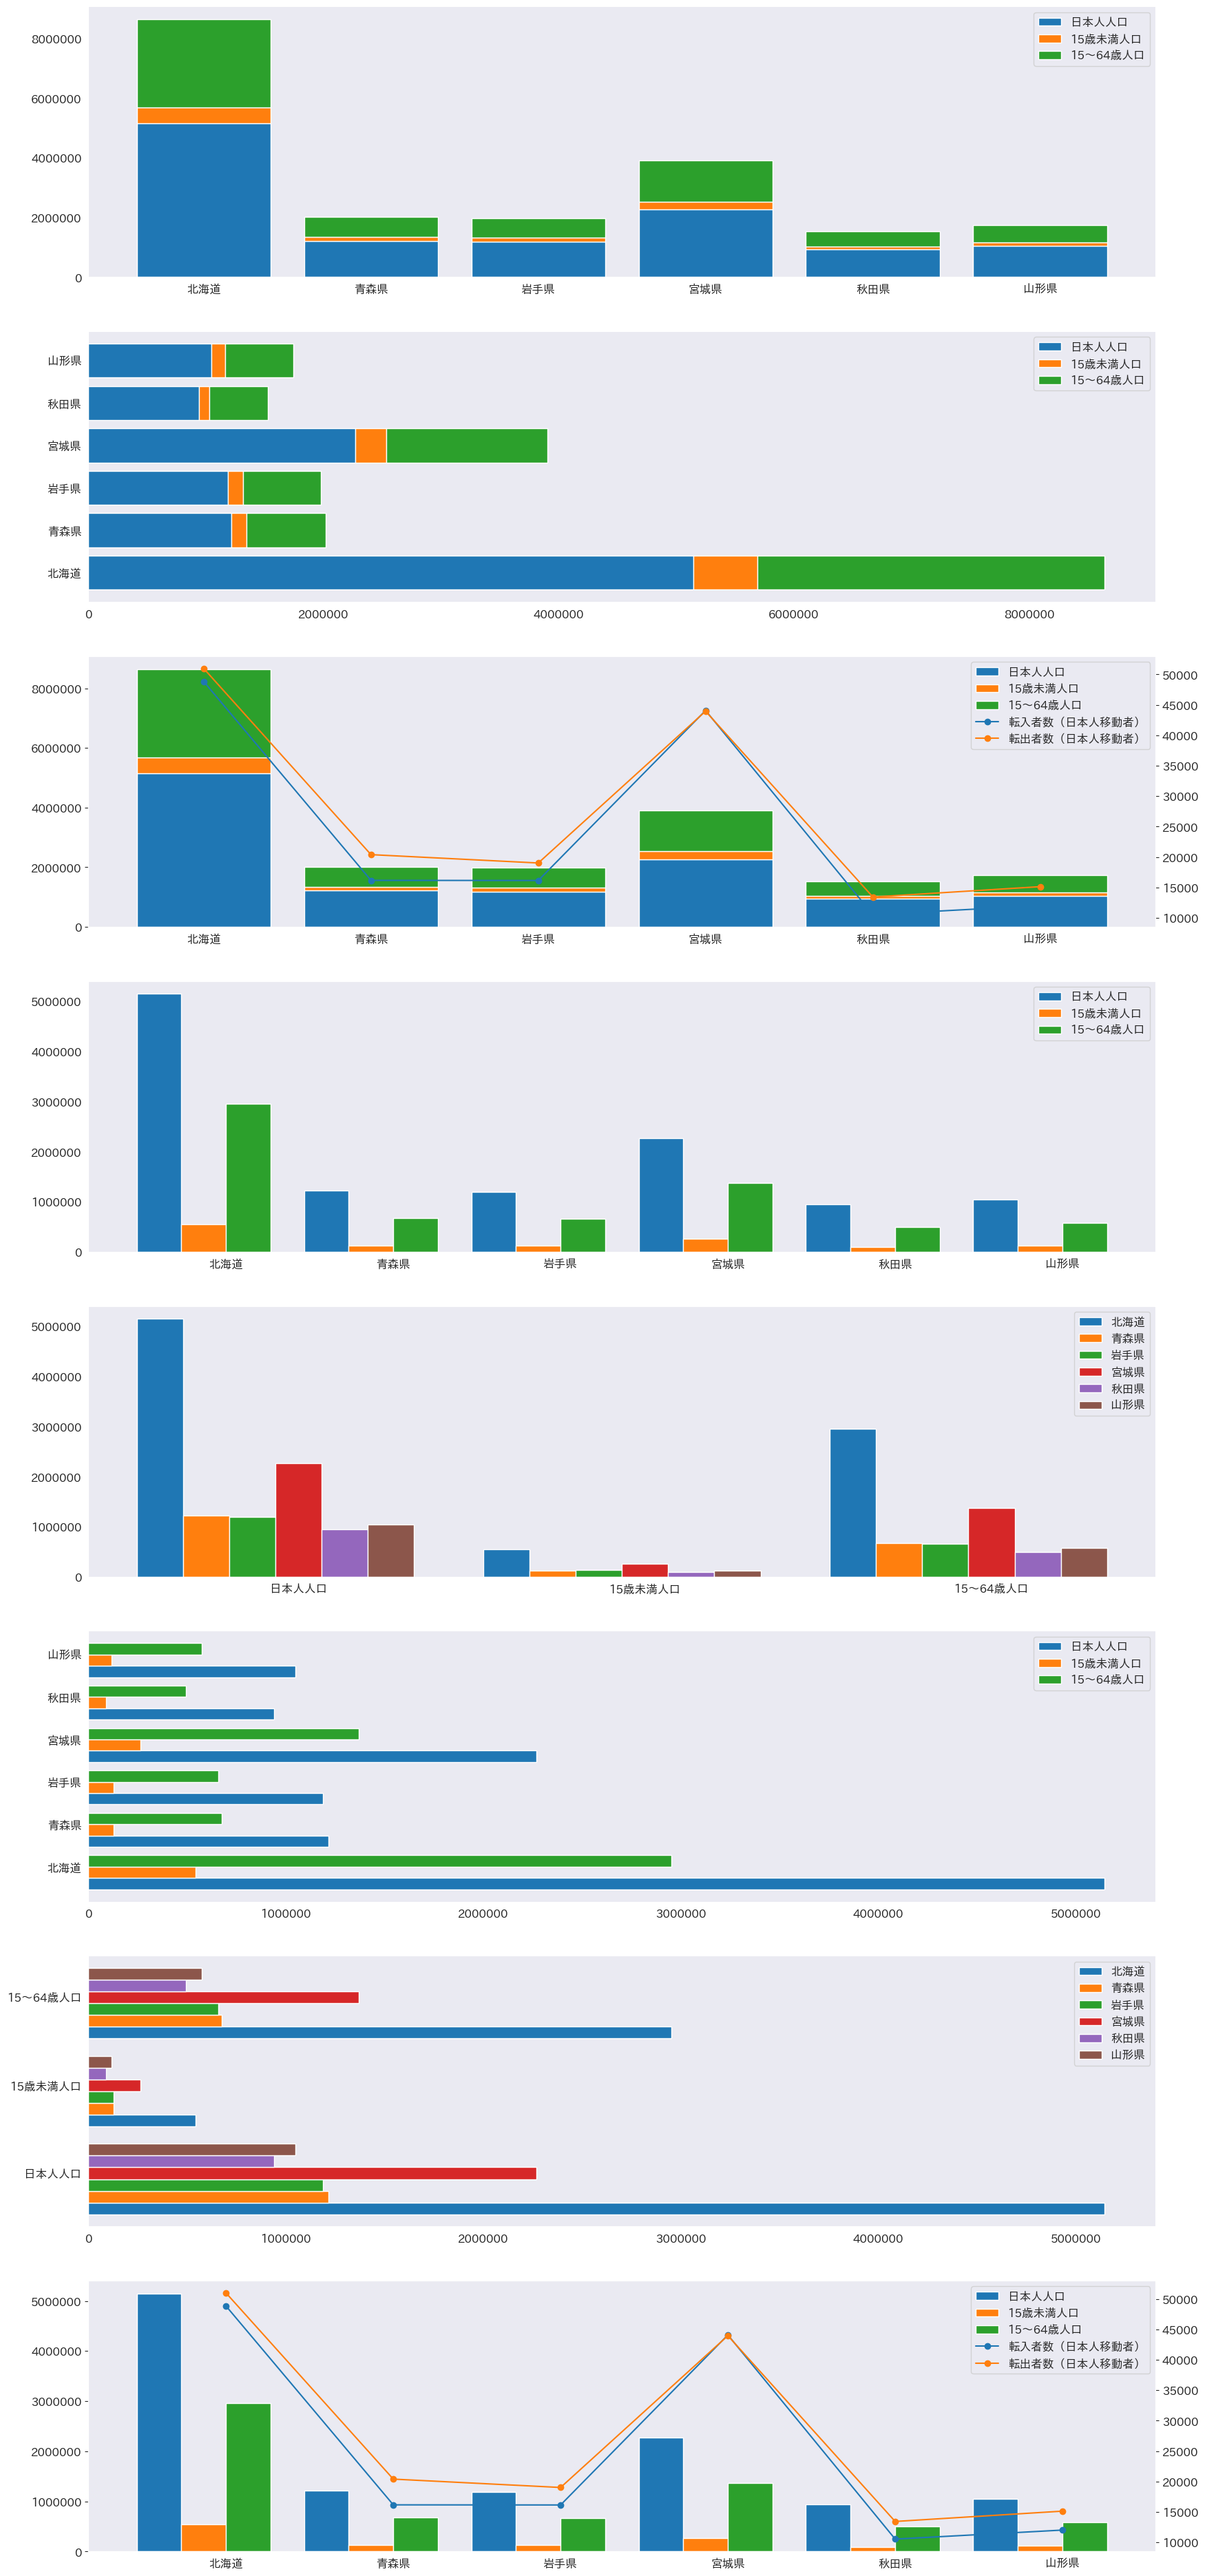

In [4]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8) = plt.subplots(8, 1, figsize=(20, 48))
dx = Dual_axis(idx=df.index[1:7],
               cols=df.columns[2:5],
               cols2=df.columns[[10, 11]],
               data=df )

dx.stacked_bar(ax=ax1)                # 積上げ棒グラフ（縦）
dx.stacked_barh(ax=ax2)               # 積上げ棒グラフ（横）
dx.stacked_bar_with_lines(ax=ax3)     # 積上げ棒グラフ（縦）＋ 二軸折れ線グラフ
dx.clustered_bar1(ax4)                # 集合棒グラフ１（縦）
dx.clustered_bar2(ax=ax5)             # 集合棒グラフ２（縦）
dx.clustered_barh1(ax6)               # 集合棒グラフ１（横）
dx.clustered_barh2(ax7)               # 集合棒グラフ２（横）
dx.clustered_bar1_with_lines(ax8)     # 集合棒グラフ１（縦）＋ 二軸折れ線グラフ
